# Служебные команды для настройки базы данных SQLite

In [ ]:
!git clone https://github.com/ivanceras/sakila.git

fatal: destination path 'sakila' already exists and is not an empty directory.


In [ ]:
import sqlite3 as sq
import pandas as pd
import numpy as np

In [ ]:
# Пути к файлам базы данных в SQLite
file_db = "/content/sakila/sqlite-sakila-db/sakila.db"
file_schema = "/content/sakila/sqlite-sakila-db/sqlite-sakila-schema.sql"
file_insert_data = "/content/sakila/sqlite-sakila-db/sqlite-sakila-insert-data.sql"
file_delete_data = "/content/sakila/sqlite-sakila-db/sqlite-sakila-delete-data.sql"
file_drop_schema = "/content/sakila/sqlite-sakila-db/sqlite-sakila-drop-objects.sql"


with open(file_drop_schema, "r", encoding="UTF-8") as f:
    str_sql_script_drop_schema = f.read()

with open(file_delete_data, "r", encoding="UTF-8") as f:
    str_sql_script_delete_data = f.read()

with open(file_schema, "r", encoding="UTF-8") as f:
    str_sql_script_insert_schema = f.read()

with open(file_insert_data, "r", encoding="UTF-8") as f:
    str_sql_script_insert_data = f.read()
    

# Подключение к базе данных
connection = sq.connect(file_db)
# Место выполнения запросов к базе данных
cur = connection.cursor()

# Создание базы с данными из скриптов
cur.executescript(str_sql_script_delete_data)
cur.executescript(str_sql_script_drop_schema)
cur.executescript(str_sql_script_insert_schema)
cur.executescript(str_sql_script_insert_data)

# **Работа с базами данных в Pandas**

## База данных Sakila

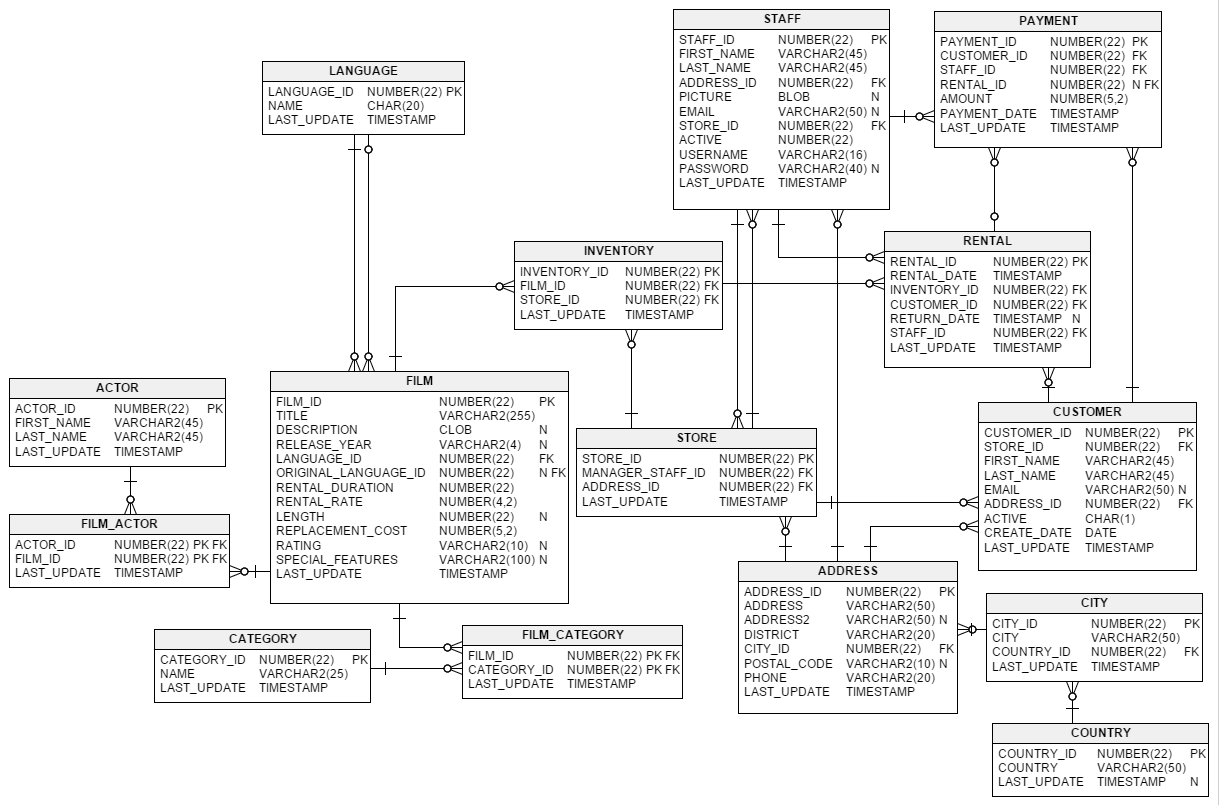

In [ ]:
# Подключение к базе данных
file_db = "/content/sakila/sqlite-sakila-db/sakila.db"
conn = sq.connect(file_db)

In [ ]:
# Просмотр названий таблиц в SQLITE
sql_query1 = """
    SELECT name, type
    FROM sqlite_master 
    WHERE type='table';
"""

name_table_db = pd.read_sql(sql_query1, conn)

In [ ]:
name_table_db

,name,type
0,sqlite_sequence,table
1,actor,table
2,country,table
3,city,table
4,address,table
5,language,table
6,category,table
7,customer,table
8,film,table
9,film_actor,table


In [ ]:
# Просмотр структуры таблицы в SQLITE
# cid      name          type     notnull  dflt_value  pk    
table_to_know = "payment"

sql_query2 = f"""
    PRAGMA TABLE_INFO({table_to_know});
"""

pd.read_sql(sql_query2, conn)

,cid,name,type,notnull,dflt_value,pk
0,0,payment_id,int,1,None,1
1,1,customer_id,INT,1,None,0
2,2,staff_id,SMALLINT,1,None,0
3,3,rental_id,INT,0,NULL,0
4,4,amount,"DECIMAL(5,2)",1,None,0
5,5,payment_date,TIMESTAMP,1,None,0
6,6,last_update,TIMESTAMP,1,None,0


# **SQL запрос на выборку данных из таблицы**





In [ ]:
pd.read_sql("""
  SELECT title, 
         description,
         length,
         rating 
  FROM film;
""", conn)

,title,description,length,rating
0,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,86,PG
1,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,48,G
2,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,50,NC-17
3,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,117,G
4,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,130,G
...,...,...,...,...
995,YOUNG LANGUAGE,A Unbelieveable Yarn of a Boat And a Database ...,183,G
996,YOUTH KICK,A Touching Drama of a Teacher And a Cat who mu...,179,NC-17
997,ZHIVAGO CORE,A Fateful Yarn of a Composer And a Man who mus...,105,NC-17
998,ZOOLANDER FICTION,A Fateful Reflection of a Waitress And a Boat ...,101,R


In [ ]:
pd.read_sql("""
  SELECT customer_id, staff_id, amount, payment_date
  FROM payment;
""", conn)

,customer_id,staff_id,amount,payment_date
0,1,1,2.99,2005-05-25 11:30:37.000
1,1,1,0.99,2005-05-28 10:35:23.000
2,1,1,5.99,2005-06-15 00:54:12.000
3,1,2,0.99,2005-06-15 18:02:53.000
4,1,2,9.99,2005-06-15 21:08:46.000
...,...,...,...,...
16044,599,1,4.99,2005-08-21 17:43:42.000
16045,599,1,1.99,2005-08-21 21:41:57.000
16046,599,2,8.99,2005-08-23 06:09:44.000
16047,599,2,2.99,2005-08-23 11:08:46.000


In [ ]:
sql_query3 = """
    SELECT *
    FROM staff;
"""

pd.read_sql(sql_query3, conn)

,staff_id,first_name,last_name,address_id,picture,email,store_id,active,username,password,last_update
0,1,Mike,Hillyer,3,None,Mike.Hillyer@sakilastaff.com,1,1,Mike,8cb2237d0679ca88db6464eac60da96345513964,2022-10-01 09:41:08
1,2,Jon,Stephens,4,None,Jon.Stephens@sakilastaff.com,2,1,Jon,8cb2237d0679ca88db6464eac60da96345513964,2022-10-01 09:41:08


In [ ]:
pd.read_sql("""
    SELECT title, description, release_year
    FROM film;
""", conn)

,title,description,release_year
0,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,2006
1,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006
2,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006
3,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006
4,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006
...,...,...,...
995,YOUNG LANGUAGE,A Unbelieveable Yarn of a Boat And a Database ...,2006
996,YOUTH KICK,A Touching Drama of a Teacher And a Cat who mu...,2006
997,ZHIVAGO CORE,A Fateful Yarn of a Composer And a Man who mus...,2006
998,ZOOLANDER FICTION,A Fateful Reflection of a Waitress And a Boat ...,2006


# Фильтрация данных WHERE

In [ ]:
pd.read_sql("""
  SELECT *
  FROM payment
  WHERE (customer_id = 305 OR 
        customer_id = 306) AND
        amount > 1 AND
        payment_date >= '2005-07-09 01:00:00.000' AND
        payment_date <= '2005-07-09 04:00:00.000';
""", conn)

,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update
0,8277,305,1,5052,2.99,2005-07-09 03:59:43.000,2022-09-22 11:33:26


In [ ]:
pd.read_sql("""
  SELECT *
  FROM actor
  WHERE LOWER(last_name) LIKE '%_bl%'
""", conn)

,actor_id,first_name,last_name,last_update
0,10,CHRISTIAN,GABLE,2022-09-22 11:33:25


In [ ]:
pd.read_sql("""
  SELECT *
  FROM payment
  WHERE customer_id = 402 AND
        staff_id = 2 AND
        payment_date > '2005-07-06';
""", conn)

,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update
0,10860,402,2,3564,6.99,2005-07-06 03:02:13.000,2022-09-22 09:51:17
1,10861,402,2,3612,3.99,2005-07-06 05:37:26.000,2022-09-22 09:51:17
2,10862,402,2,3755,5.99,2005-07-06 12:37:16.000,2022-09-22 09:51:17
3,10864,402,2,4604,3.99,2005-07-08 06:58:43.000,2022-09-22 09:51:17
4,10865,402,2,5329,4.99,2005-07-09 16:49:46.000,2022-09-22 09:51:17
5,10866,402,2,6183,2.99,2005-07-11 11:14:35.000,2022-09-22 09:51:17
6,10869,402,2,8521,7.99,2005-07-29 10:12:45.000,2022-09-22 09:51:17
7,10871,402,2,9779,0.99,2005-07-31 10:08:33.000,2022-09-22 09:51:17
8,10872,402,2,11045,0.99,2005-08-02 06:07:54.000,2022-09-22 09:51:17
9,10873,402,2,11549,4.99,2005-08-17 01:01:48.000,2022-09-22 09:51:17


In [ ]:
# Фильтрация по строкам
pd.read_sql("""
  SELECT rating as r_f,
         special_features as s_f 
  FROM film
  WHERE LOWER(r_f) LIKE '%pg%13%' AND
        LOWER(s_f) LIKE '%comm%';
""", conn)

,r_f,s_f
0,PG-13,"Trailers,Commentaries,Deleted Scenes,Behind th..."
1,PG-13,"Trailers,Commentaries"
2,PG-13,"Commentaries,Behind the Scenes"
3,PG-13,"Commentaries,Deleted Scenes,Behind the Scenes"
4,PG-13,"Trailers,Commentaries"
...,...,...
112,PG-13,"Commentaries,Deleted Scenes"
113,PG-13,"Commentaries,Behind the Scenes"
114,PG-13,"Commentaries,Behind the Scenes"
115,PG-13,"Commentaries,Deleted Scenes,Behind the Scenes"


In [ ]:
# Фильтрация таблицы по числам и датам
pd.read_sql("""
    SELECT *
    FROM payment
    WHERE customer_id = 15 AND 
          amount > 3.0 AND
          payment_date > '2005-06-21';
""", conn)

,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update
0,389,15,1,3550,7.99,2005-07-06 02:29:21.000,2022-09-22 06:18:30
1,390,15,1,4127,5.99,2005-07-07 07:26:19.000,2022-09-22 06:18:30
2,393,15,1,7105,4.99,2005-07-27 05:15:37.000,2022-09-22 06:18:30
3,395,15,2,8615,6.99,2005-07-29 13:36:01.000,2022-09-22 06:18:30
4,396,15,2,8927,4.99,2005-07-30 02:13:31.000,2022-09-22 06:18:30
5,402,15,1,11922,7.99,2005-08-17 16:20:37.000,2022-09-22 06:18:30
6,406,15,2,13339,8.99,2005-08-19 20:18:36.000,2022-09-22 06:18:30
7,407,15,1,13393,5.99,2005-08-19 22:03:46.000,2022-09-22 06:18:30
8,408,15,2,13503,5.99,2005-08-20 02:00:33.000,2022-09-22 06:18:30
9,409,15,1,13541,4.99,2005-08-20 03:41:41.000,2022-09-22 06:18:30


#  Сортировка ORDER BY

In [ ]:
pd.read_sql("""
  SELECT *
  FROM payment
  ORDER BY amount DESC, 
           staff_id ASC;
""", conn)

,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update
0,8272,305,1,2166.0,11.99,2005-06-17 23:51:21.000,2022-09-22 11:33:26
1,9803,362,1,14759.0,11.99,2005-08-21 23:28:58.000,2022-09-22 11:33:26
2,15850,592,1,3973.0,11.99,2005-07-06 22:58:31.000,2022-09-22 11:33:26
3,342,13,2,8831.0,11.99,2005-07-29 22:37:41.000,2022-09-22 11:33:26
4,3146,116,2,14763.0,11.99,2005-08-21 23:34:00.000,2022-09-22 11:33:26
...,...,...,...,...,...,...,...
16044,7244,267,2,13713.0,0.00,2006-02-14 15:16:03.000,2022-09-22 11:33:26
16045,7303,269,2,12610.0,0.00,2006-02-14 15:16:03.000,2022-09-22 11:33:26
16046,7707,284,2,12959.0,0.00,2006-02-14 15:16:03.000,2022-09-22 11:33:26
16047,12357,457,2,14516.0,0.00,2006-02-14 15:16:03.000,2022-09-22 11:33:26


In [ ]:
orient = "ASC"

pd.read_sql(f"""
  SELECT *
  FROM film
  ORDER BY rating {orient}, rental_rate DESC;
""", conn)

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2022-09-22 09:51:15
1,46,AUTUMN CROW,A Beautiful Tale of a Dentist And a Mad Cow wh...,2006,1,None,3,4.99,108,13.99,G,"Trailers,Commentaries,Deleted Scenes,Behind th...",2022-09-22 09:51:15
2,61,BEAUTY GREASE,A Fast-Paced Display of a Composer And a Moose...,2006,1,None,5,4.99,175,28.99,G,"Trailers,Commentaries",2022-09-22 09:51:15
3,75,BIRD INDEPENDENCE,A Thrilling Documentary of a Car And a Student...,2006,1,None,6,4.99,163,14.99,G,"Commentaries,Behind the Scenes",2022-09-22 09:51:15
4,77,BIRDS PERDITION,A Boring Story of a Womanizer And a Pioneer wh...,2006,1,None,5,4.99,61,15.99,G,"Trailers,Behind the Scenes",2022-09-22 09:51:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,945,VIRGINIAN PLUTO,A Emotional Panorama of a Dentist And a Crocod...,2006,1,None,5,0.99,164,22.99,R,Deleted Scenes,2022-09-22 09:51:15
996,974,WILD APOLLO,A Beautiful Story of a Monkey And a Sumo Wrest...,2006,1,None,4,0.99,181,24.99,R,"Trailers,Commentaries,Deleted Scenes,Behind th...",2022-09-22 09:51:15
997,976,WIND PHANTOM,A Touching Saga of a Madman And a Forensic Psy...,2006,1,None,6,0.99,111,12.99,R,"Commentaries,Deleted Scenes",2022-09-22 09:51:15
998,978,WISDOM WORKER,A Unbelieveable Saga of a Forensic Psychologis...,2006,1,None,3,0.99,98,12.99,R,"Deleted Scenes,Behind the Scenes",2022-09-22 09:51:15


In [ ]:
# Сортировка по полю amount
direction = "DESC"

pd.read_sql(f"""
    SELECT *
    FROM payment
    WHERE customer_id = 15 AND 
          amount > 3.0 AND
          payment_date > '2005-06-21'
    ORDER BY amount {direction}, 
             payment_id DESC;
""", conn)

,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update
0,413,15,2,14872,8.99,2005-08-22 03:23:41.000,2022-09-22 06:18:30
1,406,15,2,13339,8.99,2005-08-19 20:18:36.000,2022-09-22 06:18:30
2,402,15,1,11922,7.99,2005-08-17 16:20:37.000,2022-09-22 06:18:30
3,389,15,1,3550,7.99,2005-07-06 02:29:21.000,2022-09-22 06:18:30
4,395,15,2,8615,6.99,2005-07-29 13:36:01.000,2022-09-22 06:18:30
5,408,15,2,13503,5.99,2005-08-20 02:00:33.000,2022-09-22 06:18:30
6,407,15,1,13393,5.99,2005-08-19 22:03:46.000,2022-09-22 06:18:30
7,390,15,1,4127,5.99,2005-07-07 07:26:19.000,2022-09-22 06:18:30
8,415,15,1,15897,4.99,2005-08-23 17:12:31.000,2022-09-22 06:18:30
9,412,15,2,14776,4.99,2005-08-21 23:53:35.000,2022-09-22 06:18:30


# Agg GROUP BY

In [ ]:
pd.read_sql("""
  SELECT customer_id,
         COUNT(payment_id) AS cnt_bills,
         ROUND(AVG(amount), 2) AS avg_amount,
         SUM(amount) AS sum_amount 
  FROM payment
  WHERE payment_date > '2005-08-20'
  GROUP BY customer_id
  ORDER BY cnt_bills DESC;
""", conn)

,customer_id,cnt_bills,avg_amount,sum_amount
0,147,11,4.54,49.89
1,148,11,4.35,47.89
2,410,11,4.26,46.89
3,15,10,3.99,39.90
4,93,10,3.79,37.90
...,...,...,...,...
588,531,1,0.99,0.99
589,549,1,0.99,0.99
590,555,1,6.99,6.99
591,583,1,0.99,0.99


In [ ]:
pd.read_sql("""
  SELECT rating, 
         AVG(length) AS avg_len,
         COUNT(film_id) AS cnt_films,
         AVG(replacement_cost) AS avg_repl
  FROM film
  WHERE LOWER(special_features) LIKE '%del%'
  GROUP BY rating;
""", conn)

,rating,avg_len,cnt_films,avg_repl
0,G,110.855556,90,20.567778
1,NC-17,114.220183,109,20.219358
2,PG,109.619048,105,18.932857
3,PG-13,123.442308,104,20.634231
4,R,115.178947,95,20.842632


In [ ]:
# Агрегация GROUP BY

pd.read_sql("""
    SELECT customer_id,
           COUNT(payment_id) AS cnt_bills,
           AVG(amount) AS avg_amount,
           SUM(amount) AS sum_amount
    FROM payment
    GROUP BY customer_id
    ORDER BY sum_amount DESC;
""", conn)

,customer_id,cnt_bills,avg_amount,sum_amount
0,526,45,4.923333,221.55
1,148,46,4.707391,216.54
2,144,42,4.656667,195.58
3,137,39,4.990000,194.61
4,178,39,4.990000,194.61
...,...,...,...,...
594,97,18,3.267778,58.82
595,395,19,3.042632,57.81
596,318,12,4.406667,52.88
597,281,14,3.632857,50.86


# Дополнение данных JOIN

image.png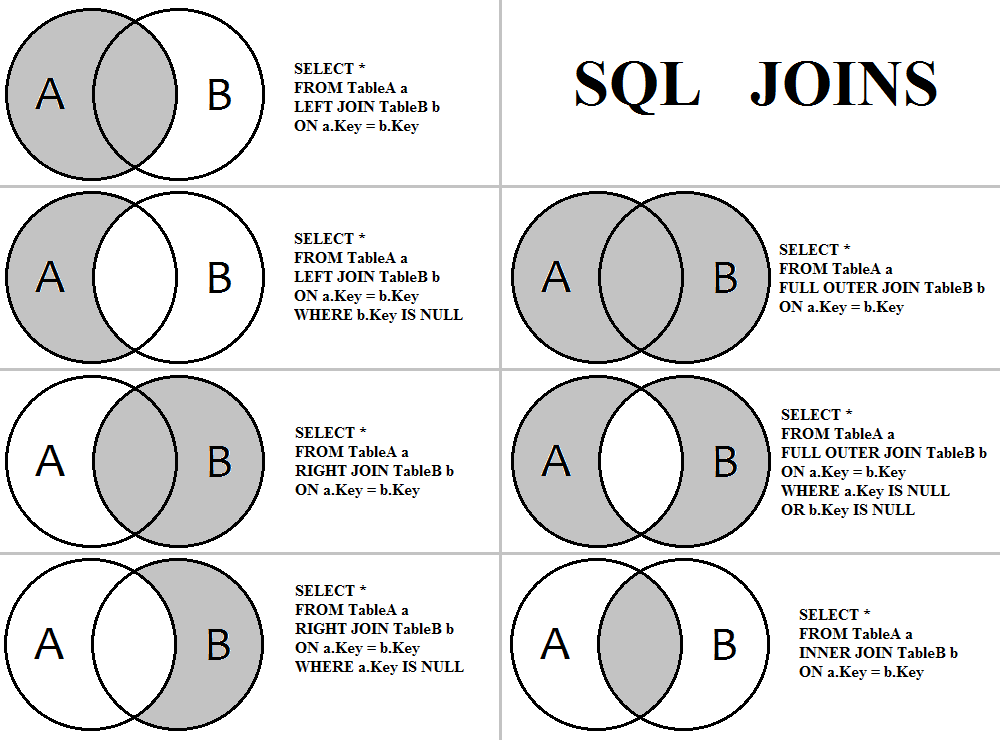

In [ ]:
pd.read_sql("""
  SELECT t1.payment_id,
         t1.staff_id,
         t1.amount,
         t1.payment_date,
         t2.first_name,
         t2.last_name,
         t2.email,
         t2.address_id
  FROM payment t1
  LEFT JOIN customer t2 ON t1.customer_id = t2.customer_id;
""", conn)

,payment_id,staff_id,amount,payment_date,first_name,last_name,email,address_id
0,1,1,2.99,2005-05-25 11:30:37.000,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5
1,2,1,0.99,2005-05-28 10:35:23.000,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5
2,3,1,5.99,2005-06-15 00:54:12.000,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5
3,4,2,0.99,2005-06-15 18:02:53.000,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5
4,5,2,9.99,2005-06-15 21:08:46.000,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5
...,...,...,...,...,...,...,...,...
16044,16045,1,4.99,2005-08-21 17:43:42.000,AUSTIN,CINTRON,AUSTIN.CINTRON@sakilacustomer.org,605
16045,16046,1,1.99,2005-08-21 21:41:57.000,AUSTIN,CINTRON,AUSTIN.CINTRON@sakilacustomer.org,605
16046,16047,2,8.99,2005-08-23 06:09:44.000,AUSTIN,CINTRON,AUSTIN.CINTRON@sakilacustomer.org,605
16047,16048,2,2.99,2005-08-23 11:08:46.000,AUSTIN,CINTRON,AUSTIN.CINTRON@sakilacustomer.org,605


In [ ]:
pd.read_sql("""
  SELECT t1.payment_id, 
         t1.staff_id,
         ROUND(t1.amount) AS amount, 
         t1.payment_date,
         t2.first_name,
         t2.last_name,
         t2.email,
         t2.address_id
  FROM payment t1
  LEFT JOIN customer t2 ON t1.customer_id = t2.customer_id
  WHERE first_name LIKE 'R%' AND
        staff_id = 2
  ORDER BY amount DESC;
""", conn)

,payment_id,staff_id,amount,payment_date,first_name,last_name,email,address_id
0,5550,2,12.0,2005-08-22 23:48:56.000,ROSEMARY,SCHMIDT,ROSEMARY.SCHMIDT@sakilacustomer.org,208
1,9392,2,11.0,2005-08-18 09:13:42.000,RYAN,SALISBURY,RYAN.SALISBURY@sakilacustomer.org,352
2,491,2,10.0,2005-05-25 18:43:49.000,RUTH,MARTINEZ,RUTH.MARTINEZ@sakilacustomer.org,23
3,503,2,10.0,2005-07-31 20:01:06.000,RUTH,MARTINEZ,RUTH.MARTINEZ@sakilacustomer.org,23
4,2454,2,10.0,2005-07-30 00:08:08.000,RUBY,WASHINGTON,RUBY.WASHINGTON@sakilacustomer.org,94
...,...,...,...,...,...,...,...,...
537,14022,2,1.0,2005-07-07 15:31:57.000,ROLAND,SOUTH,ROLAND.SOUTH@sakilacustomer.org,527
538,14027,2,1.0,2005-07-10 09:06:03.000,ROLAND,SOUTH,ROLAND.SOUTH@sakilacustomer.org,527
539,15550,2,1.0,2005-07-31 13:10:45.000,ROSS,GREY,ROSS.GREY@sakilacustomer.org,586
540,15882,2,1.0,2005-07-08 08:03:22.000,RENE,MCALISTER,RENE.MCALISTER@sakilacustomer.org,599


In [ ]:
pd.read_sql("""
  SELECT *
  FROM address;
""", conn)

,address_id,address,address2,district,city_id,postal_code,phone,last_update
0,1,47 MySakila Drive,None,,300,None,,2022-09-22 11:33:25
1,2,28 MySQL Boulevard,None,,576,None,,2022-09-22 11:33:25
2,3,23 Workhaven Lane,None,,300,None,,2022-09-22 11:33:25
3,4,1411 Lillydale Drive,None,,576,None,,2022-09-22 11:33:25
4,5,1913 Hanoi Way,None,,463,35200,,2022-09-22 11:33:25
...,...,...,...,...,...,...,...,...
598,601,844 Bucuresti Place,None,,242,36603,,2022-09-22 11:33:25
599,602,1101 Bucuresti Boulevard,None,,401,97661,,2022-09-22 11:33:25
600,603,1103 Quilmes Boulevard,None,,503,52137,,2022-09-22 11:33:25
601,604,1331 Usak Boulevard,None,,296,61960,,2022-09-22 11:33:25


In [ ]:
# Просмотр таблицы с PK customer_id

pd.read_sql("""
    SELECT t2.first_name AS first_name, 
           t2.last_name AS last_name, 
           t2.email AS email,
           t1.cnt_bills AS cnt_bills,
           t1.avg_amount AS avg_amount,
           t1.sum_amount AS sum_amount,
           t3.address,
           t3.city_id
    FROM (SELECT customer_id,
                 COUNT(payment_id) AS cnt_bills,
                 AVG(amount) AS avg_amount,
                 SUM(amount) AS sum_amount
          FROM payment
          GROUP BY customer_id
          ORDER BY sum_amount DESC) t1
    LEFT JOIN customer t2 USING(customer_id)
    LEFT JOIN address t3 USING(address_id);
""", conn)
# LEFT JOIN customer t2 ON t1.customer_id = t2.customer_id

,first_name,last_name,email,cnt_bills,avg_amount,sum_amount,address,city_id
0,KARL,SEAL,KARL.SEAL@sakilacustomer.org,45,4.923333,221.55,1427 Tabuk Place,101
1,ELEANOR,HUNT,ELEANOR.HUNT@sakilacustomer.org,46,4.707391,216.54,1952 Pune Lane,442
2,CLARA,SHAW,CLARA.SHAW@sakilacustomer.org,42,4.656667,195.58,1027 Songkhla Manor,340
3,RHONDA,KENNEDY,RHONDA.KENNEDY@sakilacustomer.org,39,4.990000,194.61,1749 Daxian Place,29
4,MARION,SNYDER,MARION.SNYDER@sakilacustomer.org,39,4.990000,194.61,1891 Rizhao Boulevard,456
...,...,...,...,...,...,...,...,...
594,ANNIE,RUSSELL,ANNIE.RUSSELL@sakilacustomer.org,18,3.267778,58.82,1599 Plock Drive,534
595,JOHNNY,TURPIN,JOHNNY.TURPIN@sakilacustomer.org,19,3.042632,57.81,1152 Citrus Heights Manor,15
596,BRIAN,WYMAN,BRIAN.WYMAN@sakilacustomer.org,12,4.406667,52.88,1769 Iwaki Lane,97
597,LEONA,OBRIEN,LEONA.OBRIEN@sakilacustomer.org,14,3.632857,50.86,1308 Sumy Loop,175


# Задания

## **1. Выведите таблицу актеров с именем ‘Scarlett’**?

In [ ]:
pd.read_sql("""
   SELECT * 
   FROM actor
   WHERE first_name = 'SCARLETT'
""", conn)

,actor_id,first_name,last_name,last_update
0,81,SCARLETT,DAMON,2022-10-01 09:41:08
1,124,SCARLETT,BENING,2022-10-01 09:41:08


## **2. Выведите таблицу актеров с фамилией ‘Johansson’**



In [ ]:
pd.read_sql("""
   SELECT * 
   FROM actor
   WHERE last_name = 'JOHANSSON'
""", conn)

,actor_id,first_name,last_name,last_update
0,8,MATTHEW,JOHANSSON,2022-10-01 09:41:08
1,64,RAY,JOHANSSON,2022-10-01 09:41:08
2,146,ALBERT,JOHANSSON,2022-10-01 09:41:08


## **3. Какое количество уникальных фамилий актеров присутствует в наборе данных?**

In [ ]:
pd.read_sql("""
   SELECT * 
   FROM actor
""", conn).last_name.nunique()

121

## **4. Какие фамилии актеров не повторяются?**

In [ ]:
pd.read_sql("""
   SELECT last_name, COUNT(*) AS count
   FROM actor
   GROUP BY last_name HAVING count == 1
""", conn)

,last_name,count
0,ASTAIRE,1
1,BACALL,1
2,BALE,1
3,BALL,1
4,BARRYMORE,1
...,...,...
61,WALKEN,1
62,WAYNE,1
63,WILSON,1
64,WITHERSPOON,1


## **5. Какие фамилии появляются более одного раза?**

In [ ]:
pd.read_sql("""
   SELECT last_name, COUNT(*) AS count
   FROM actor
   GROUP BY last_name HAVING count > 1
""", conn)

,last_name,count
0,AKROYD,3
1,ALLEN,3
2,BAILEY,2
3,BENING,2
4,BERRY,3
5,BOLGER,2
6,BRODY,2
7,CAGE,2
8,CHASE,2
9,CRAWFORD,2


## **6. Какой актер появляется в большинстве фильмов?**

In [ ]:
pd.read_sql("""
   SELECT actor_id, COUNT(film_id) AS count, first_name, last_name
   FROM film_actor
   natural join actor
   GROUP BY actor_id
   ORDER BY count DESC
""", conn)

,actor_id,count,first_name,last_name
0,107,42,GINA,DEGENERES
1,102,41,WALTER,TORN
2,198,40,MARY,KEITEL
3,181,39,MATTHEW,CARREY
4,23,37,SANDRA,KILMER
...,...,...,...,...
195,71,18,ADAM,GRANT
196,186,16,JULIA,ZELLWEGER
197,35,15,JUDY,DEAN
198,199,15,JULIA,FAWCETT


## **7. Доступна ли ‘Academy Dinosaur’ для проката из Store 1?**

In [ ]:
pd.read_sql("""
   SELECT f1.title, 
          i1.store_id
   FROM inventory i1
   LEFT JOIN film f1 ON f1.film_id = i1.film_id
   WHERE LOWER(f1.title) LIKE 'academy dinosaur' AND i1.store_id = 1
""", conn)['store_id'].sum() != 0

True

## **8. Когда выйдет ‘Academy Dinosaur’?**

In [ ]:
pd.read_sql("""
   SELECT release_year
   FROM film
   WHERE LOWER(title) LIKE 'academy dinosaur'
""", conn)['release_year']

0    2006
Name: release_year, dtype: object

## **9. Какова средняя продолжительность всех фильмов в sakila DB?**

In [ ]:
pd.read_sql("""
   SELECT length
   FROM film
""", conn).mean()

length    115.272
dtype: float64

## **10. Какова средняя продолжительность фильмов по категориям?**

In [ ]:
pd.read_sql("""
   SELECT c1.name, f1.length
   FROM film_category fc1
   LEFT JOIN film f1 ON f1.film_id = fc1.film_id
   LEFT JOIN category c1 ON c1.category_id = fc1.category_id
""", conn).groupby('name', as_index=False)['length'].mean()

,name,length
0,Action,111.609375
1,Animation,111.015152
2,Children,109.800000
3,Classics,111.666667
4,Comedy,115.827586
5,Documentary,108.750000
6,Drama,120.838710
7,Family,114.782609
8,Foreign,121.698630
9,Games,127.836066


## **11. Почему этот запрос возвращает пустой набор?**

    select * from film natural join inventory;


ВАШ ОТВЕТ ЗДЕСЬ: не возвращает пустой набор



In [ ]:
pd.read_sql("""
   select * from film natural join inventory
""", conn)

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update,inventory_id,store_id
0,1,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2022-10-01 09:41:08,1,1
1,1,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2022-10-01 09:41:08,2,1
2,1,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2022-10-01 09:41:08,3,1
3,1,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2022-10-01 09:41:08,4,1
4,1,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientis...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2022-10-01 09:41:08,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4576,1000,ZORRO ARK,A Intrepid Panorama of a Mad Scientist And a B...,2006,1,None,3,4.99,50,18.99,NC-17,"Trailers,Commentaries,Behind the Scenes",2022-10-01 09:41:08,4577,1
4577,1000,ZORRO ARK,A Intrepid Panorama of a Mad Scientist And a B...,2006,1,None,3,4.99,50,18.99,NC-17,"Trailers,Commentaries,Behind the Scenes",2022-10-01 09:41:08,4578,2
4578,1000,ZORRO ARK,A Intrepid Panorama of a Mad Scientist And a B...,2006,1,None,3,4.99,50,18.99,NC-17,"Trailers,Commentaries,Behind the Scenes",2022-10-01 09:41:08,4579,2
4579,1000,ZORRO ARK,A Intrepid Panorama of a Mad Scientist And a B...,2006,1,None,3,4.99,50,18.99,NC-17,"Trailers,Commentaries,Behind the Scenes",2022-10-01 09:41:08,4580,2
